In [0]:
import cv2
import numpy as np

In [0]:

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [90]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

path = '/content/gdrive/My Drive/Colab Notebooks/The Complete Self-Driving Car Course - Applied Deep Learning/test_image.jpg'

Mounted at /content/gdrive


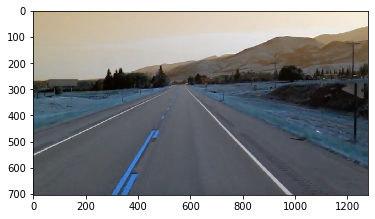

In [91]:
# Read in the image
image = cv2.imread(path)
# print(image.shape)         (704, 1279, 3)
plt.imshow(image)

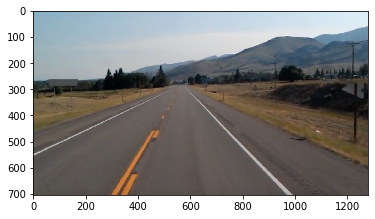

In [92]:
# as opencv loads in BGR format by default, we want to show it in RGB.
new_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# print(new_image.shape)         (704, 1279, 3)
plt.imshow(new_image)

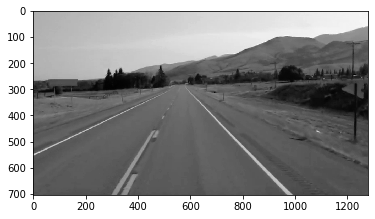

In [93]:
new_image = cv2.cvtColor(new_image, cv2.COLOR_RGB2GRAY)
# print(new_image.shape)      (704, 1279)
plt.imshow(new_image, cmap='gray')

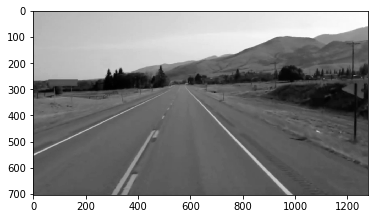

In [94]:
# To reduce noise & smoothen image. Image noise can create false edges & ultimately affect edge detection
# The below line of code applies a gaussian blur by convolving gray scale image with a kernel of gaussian values (usually of size 5x5) thus filtering 
# noise & smoothening our image.
blur = cv2.GaussianBlur(new_image, (5,5), 0)      # deviation=0
# print(blur.shape)            (704, 1279)
plt.imshow(blur, cmap='gray')

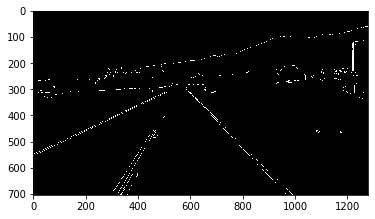

In [95]:
# The above step was actually optional since the canny function is going to internally apply the 5x5 gaussian
# The canny function performs a derivative on our function in both x & y directions, thereby measuring change in intensity wrt adjacent pixels
# The strongest gradient is traced as a series of white pixels
# upper threshold: if gradient is larger than upper threshold then it is accepted as an edge pixel
# lower threshold: if gradient is below the lower threshold then it is rejected
# if the gradient is b/w the thresholds then it will be accepted only if it is connected to a strong edge. Recommended ration of 1:2 or 1:3
canny = cv2.Canny(blur, 50, 150)
# print(canny.shape)       (704, 1279)
plt.imshow(canny, cmap='gray')

In [0]:
height = canny.shape[0]       # 704
polygons = np.array([[(200, height), (1100, height), (550, 250)]])
# polygons
# array([[[ 200,  704],
#         [1100,  704],
#         [ 550,  250]]])
# polygons.shape              (1, 3, 2)

mask = np.zeros_like(canny)
# mask.shape                  (704, 1279)